In [1]:
%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as animation

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

## Krmiljenje sistema masa-vzmet-dušilka

Ta primer prikazuje izvedbo krmiljenja sistema masa-vzmet-dušilka, ki je tipičen primer sistema drugega reda z eno prostostno stopnjo. Sistem sestoji iz premikajoče se mase (upor zanemarimo), ki je z neskončno raztegljivim parom vzmeti in dušilke pripeta na referenčno točko.<br><br>
<img src="Images/mbk.png" width="40%" />
<br>

Gibalna enačba sistema je:
<br>
$$m\cdot\ddot{x}+b\cdot\dot{x}+k\cdot{x}=F$$
<br>
Po Laplaceovi transformaciji zgornje diferencialne enačbe lahko zapišemo prenosno funkcijo sistema:
<br>
$$G(s)=\frac{1}{m\cdot s^2 +b\cdot s + k}$$
<br>
Tvoja naloga je, da izbereš tip krmilnika in nastaviš njegove parametre tako, da bo delovanje sistema sprejemljivo.

<b>Najprej izberi model sistema!</b>

<!-- The following example is a control design task for a mass-spring-damper system, a typical second-order model. The structure consists of a sliding mass (friction is ignored), connected to a reference point with an infinitely expandable string-damper pair.<br><br>
<img src="Images/mbk.png" width="40%" />
<br>

Its equation of motion can be stated as:
<br>
$$m\cdot\ddot{x}+b\cdot\dot{x}+k\cdot{x}=F$$
<br>
After the Laplace-transformation of the differential equation, the transfer function can be expressed as:
<br>
$$G(s)=\frac{1}{m\cdot s^2 +b\cdot s + k}$$
<br>
Your task is to choose a controller type, and tune it to acceptable levels of performance!

<b>First, choose a system model!</b> -->

<IPython.core.display.Javascript object>


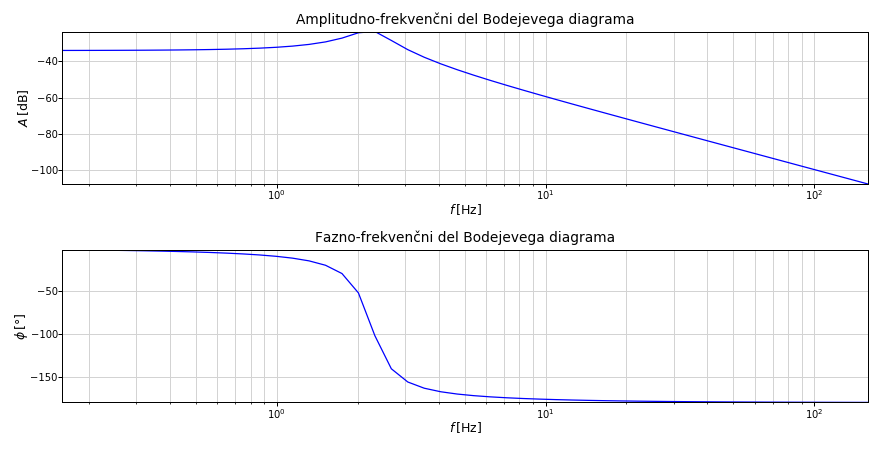

ToggleButtons(description='Sistem: ', index=6, layout=Layout(width='60%'), options=(('Model 1', 0), ('Model 2'…

Output()

Output()

In [2]:
# Figure definition

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1, num='Slika 1')
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [])
f1_line2, = f1_ax2.plot([], [])  

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='both', tight=True)
f1_ax2.autoscale(enable=True, axis='both', tight=True)

f1_ax1.set_title('Amplitudno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Fazno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

# System parameters

def build_base_model(m, k, b):
    
    W_sys = c.tf([1], [m, b, k])
    
    print('Prenosna funkcija sistema:')
    print(W_sys)
    
    # System analysis
    
    poles = c.pole(W_sys)     # Poles
    
    print('Poli sistema:\n')
    print(poles)
    
    global f1_line1, f1_line2
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)
    
    mag, phase, omega = c.bode_plot(W_sys, Plot=False)   # Bode-plot
    
    f1_line1, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f1_line2, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   
    
    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    
# GUI widgets

typeSelect = w.ToggleButtons(
    options=[('Model 1', 0), ('Model 2', 1), ('Model 3', 2), ('Model 4', 3), ('Model 5', 4), ('Model 6', 5), ('Ponastavi', -1)],
    value =-1, description='Sistem: ', layout=w.Layout(width='60%'))

m_slider = w.FloatLogSlider(value=0.5, base=10, min=-3, max=3, description='m [kg] :', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
k_slider = w.FloatLogSlider(value=100, base=10, min=-2, max=4, description='k [N/m] :', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
b_slider = w.FloatLogSlider(value=50, base=10, min=-2, max=4, description='b [Ns/m] :', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))

input_data = w.interactive_output(build_base_model, {'m':m_slider, 'k':k_slider, 'b':b_slider})

def update_sliders(index):
    global m_slider, k_slider, b_slider
    
    mval = [0.05, 0.1, 0.25, 0.5, 1, 5, 0.25]
    kval = [1.25, 10, 100, 10, 50, 1000, 50]
    bval = [1, 0.5, 2, 10, 10, 20, 1]
    
    m_slider.value = mval[index]
    k_slider.value = kval[index]
    b_slider.value = bval[index]
    
    if index == -1:
        m_slider.disabled = True
        k_slider.disabled = True
        b_slider.disabled = True
    else:
        m_slider.disabled = False
        k_slider.disabled = False
        b_slider.disabled = False
    
input_data2 = w.interactive_output(update_sliders, {'index':typeSelect})

display(typeSelect, input_data2)
display(w.HBox([m_slider, k_slider, b_slider]), input_data)

Glede na izbiro sistema, je le-ta lahko pod- ali nadkritično dušen.
<br>
<b>Ustrezno nastavi parametre krmiljenja! Katere nastavitve so najboljše za izbran sistem? Zakaj?<br>
Nastavi parametre krmilnika tako, da dosežeš najkrajši čas ustalitve pri čemer naj maksimalni prenihaj znaša največ 25%!</b>

I in D komponenti PID krmilnika lahko prosto vklapljaš/izklapljaš; če je vklopljena D komponenta, lahko uporabiš tudi filter prvega reda, ki temelji na časovni konstanti D komponente.

<!-- Depending on your selection, the system is either under- or overdamped.
<br>
<b>Select a fitting controller configuration! Which one is the best for your system? Why?<br>
Set up your controller for the fastest settling time with at most 25% overshoot!</b>

You can turn on/off each of the I and D components, and if D is active, you can apply the first-order filter as well, based on the derivating time constant. -->

<IPython.core.display.Javascript object>


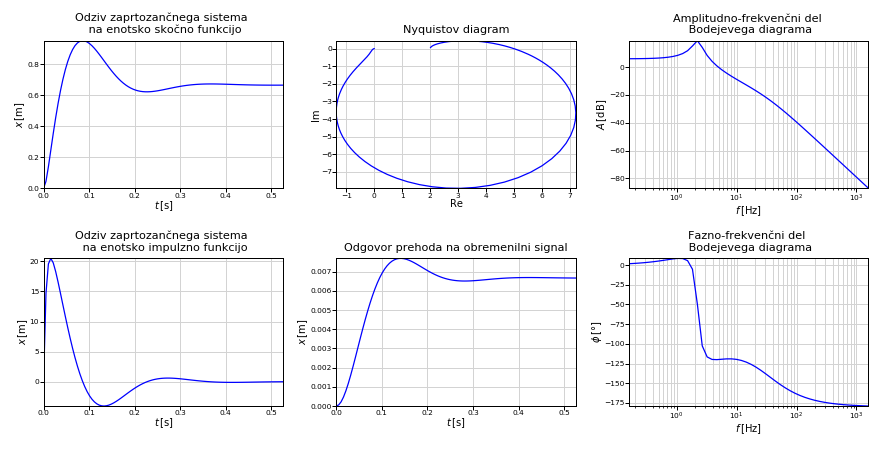

Output()

In [3]:
# PID position control

fig2, ((f2_ax1, f2_ax2, f2_ax3), (f2_ax4, f2_ax5, f2_ax6)) = plt.subplots(2, 3)
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])
f2_line2, = f2_ax2.plot([], []) 
f2_line3, = f2_ax3.plot([], [])
f2_line4, = f2_ax4.plot([], [])  
f2_line5, = f2_ax5.plot([], [])
f2_line6, = f2_ax6.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax2.grid(which='both', axis='both', color='lightgray')
f2_ax3.grid(which='both', axis='both', color='lightgray')
f2_ax4.grid(which='both', axis='both', color='lightgray')
f2_ax5.grid(which='both', axis='both', color='lightgray')
f2_ax6.grid(which='both', axis='both', color='lightgray')

f2_ax1.autoscale(enable=True, axis='both', tight=True)
f2_ax2.autoscale(enable=True, axis='both', tight=True)
f2_ax3.autoscale(enable=True, axis='both', tight=True)
f2_ax4.autoscale(enable=True, axis='both', tight=True)
f2_ax5.autoscale(enable=True, axis='both', tight=True)
f2_ax6.autoscale(enable=True, axis='both', tight=True)


f2_ax1.set_title('Odziv zaprtozančnega sistema \n na enotsko skočno funkcijo', fontsize=9)
f2_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax1.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax2.set_title('Nyquistov diagram', fontsize=9)
f2_ax2.set_xlabel(r'Re', labelpad=0, fontsize=8)
f2_ax2.set_ylabel(r'Im', labelpad=0, fontsize=8)
f2_ax2.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax3.set_title('Amplitudno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f2_ax3.set_xscale('log')
f2_ax3.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax3.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=8)
f2_ax3.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax4.set_title('Odziv zaprtozančnega sistema \n na enotsko impulzno funkcijo', fontsize=9)
f2_ax4.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax4.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax4.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax5.set_title('Odgovor prehoda na obremenilni signal', fontsize=9)
f2_ax5.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax5.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax5.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax6.set_title('Fazno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f2_ax6.set_xscale('log')
f2_ax6.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax6.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=8)
f2_ax6.tick_params(axis='both', which='both', pad=0, labelsize=6)

def position_control(Kp, Ti, Td, Fd, Ti0, Td0, Fd0, m, k, b):
    
    W_sys = c.tf([1], [m, b, k])
    
    # PID Controller
    
    P = Kp             # Proportional term
    I = Kp / Ti        # Integral term
    D = Kp * Td        # Derivative term
    Td_f = Td / Fd     # Derivative term filter
    
    W_PID = c.parallel(c.tf([P], [1]),
                       c.tf([I * Ti0], [1 * Ti0, 1 * (not Ti0)]),
                       c.tf([D * Td0, 0], [Td_f * Td0 * Fd0, 1]))  # PID controller in time constant format
    
    W_open = c.series(W_PID, W_sys)         # Open loop with two integrators added for position output
    W_closed = c.feedback(W_open, 1, -1)    # Closed loop with negative feedback
    
    W_load = c.feedback(W_sys, W_PID, -1)   # Transfer function of the load based errors  
                        
    # Display
                        
    global f2_line1, f2_line2, f2_line3, f2_line4, f2_line5, f2_line6
    
    f2_ax1.lines.remove(f2_line1)
    f2_ax2.lines.remove(f2_line2)
    f2_ax3.lines.remove(f2_line3)
    f2_ax4.lines.remove(f2_line4)
    f2_ax5.lines.remove(f2_line5)
    f2_ax6.lines.remove(f2_line6)
    
    tout, yout = c.step_response(W_closed)
    f2_line1, = f2_ax1.plot(tout, yout, lw=1, color='blue') 
    
    _, _, ob = c.nyquist_plot(W_open, Plot=False)   # Small resolution plot to determine bounds        
    real, imag, freq = c.nyquist_plot(W_open, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 1000), Plot=False)
    f2_line2, = f2_ax2.plot(real, imag, lw=1, color='blue')
    
    mag, phase, omega = c.bode_plot(W_open, Plot=False)
    f2_line3, = f2_ax3.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f2_line6, = f2_ax6.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')

    tout, yout = c.impulse_response(W_closed)
    f2_line4, = f2_ax4.plot(tout, yout, lw=1, color='blue')   

    tout, yout = c.step_response(W_load)
    f2_line5, = f2_ax5.plot(tout, yout, lw=1, color='blue')
    
    f2_ax1.relim()
    f2_ax2.relim()
    f2_ax3.relim()
    f2_ax4.relim()
    f2_ax5.relim()
    f2_ax6.relim()
    f2_ax1.autoscale_view()
    f2_ax2.autoscale_view()
    f2_ax3.autoscale_view()
    f2_ax4.autoscale_view()
    f2_ax5.autoscale_view()
    f2_ax6.autoscale_view()
    
def update_controller(index):
    global Kp_slider, Ti_slider, Td_slider, Fd_slider, Ti_button, Td_button, Fd_button
    
    if index == -1:
        Kp_slider.value = 100
        Td_slider.value = 0.05
        Fd_slider.value = 10
        Ti_button.value = False
        Td_button.value = True
        Fd_button.value = True
        
        Kp_slider.disabled = True
        Ti_slider.disabled = True
        Td_slider.disabled = True
        Fd_slider.disabled = True
        Ti_button.disabled = True
        Td_button.disabled = True
        Fd_button.disabled = True
    else:
        Kp_slider.disabled = False
        Ti_slider.disabled = False
        Td_slider.disabled = False
        Fd_slider.disabled = False
        Ti_button.disabled = False
        Td_button.disabled = False
        Fd_button.disabled = False
    
# GUI widgets

Kp_slider = w.FloatLogSlider(value=0.5, base=10, min=-1, max=4, description='Kp:', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Ti_slider = w.FloatLogSlider(value=0.0035, base=10, min=-4, max=1, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Td_slider = w.FloatLogSlider(value=1, base=10, min=-4, max=1, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))
Fd_slider = w.FloatLogSlider(value=1, base=10, min=0, max=3, description='', continuous_update=False,
                             layout=w.Layout(width='auto', flex='5 5 auto'))

Ti_button = w.ToggleButton(value=True, description='Ti',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
Td_button = w.ToggleButton(value=False, description='Td',
                           layout=w.Layout(width='auto', flex='1 1 0%'))
Fd_button = w.ToggleButton(value=False, description='Fd',
                           layout=w.Layout(width='auto', flex='1 1 0%'))

input_data = w.interactive_output(position_control, {'Kp': Kp_slider, 'Ti': Ti_slider, 'Td': Td_slider,
                                                 'Fd': Fd_slider, 'Ti0' : Ti_button, 'Td0': Td_button,
                                                 'Fd0': Fd_button, 'm':m_slider, 'k':k_slider, 'b':b_slider})

w.interactive_output(update_controller, {'index': typeSelect})

display(w.HBox([Kp_slider, Ti_button, Ti_slider, Td_button, Td_slider, Fd_button, Fd_slider]), input_data)

Na spodnji simulaciji opazuj gibanje izbranega sistema glede na nastavljene vrednosti krmilnika. Dodatno lahko spremeniš referenčni signal in dodaš motnjo; opazuj, kako se sistem odzove.

<b>Ali je izbrana nastavitev ustrezna za sledenje vstopnemu signalu? Prilagodi krmilnik tako, da bo sprejemljivo sledil sinusnemu valu!</b>
<br><br>
<i>(Animacija je prilagojena na način, da se znotraj enega simulacijskega cikla (prikazan na diagramu) odziv sistema ne spreminja. Zaradi tega se, ob spremembi nastavitev PID krmilnika, nestabilne rešitve pokažejo šele v zadnji sekundi simulacijskega cikla.)</i>

<!-- In the following simulation, you can observe the movement of your system based on your controller setup. You can create reference signals and even apply some disturbance and see how the system reacts.

<b>Is your configuration suitable for signal-following? Readjust your controller so that it can follow a sine wave acceptably!</b>
<br><br>
<i>(The animations are scaled to fit the frame through the whole simulation. Because of this, unstable solutions might not seem to move until the very last second.)</i> -->

<IPython.core.display.Javascript object>


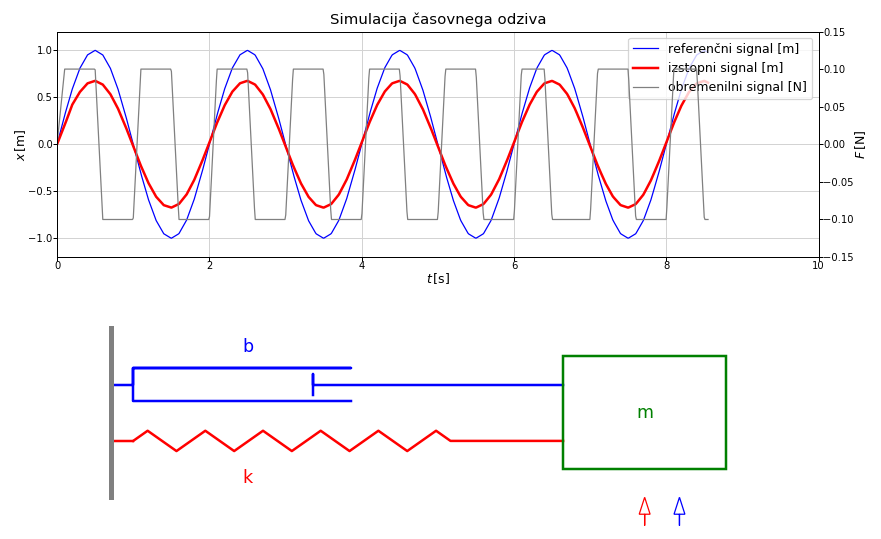

Output()

In [4]:
# Simulation data

anim_fig = plt.figure(num='Animacija 1')
anim_fig.set_size_inches((9.8, 6))
anim_fig.set_tight_layout(True)

anim_ax1 = anim_fig.add_subplot(211)
anim_ax2 = anim_ax1.twinx()

frame_count=1000

l1 = anim_ax1.plot([], [], lw=1, color='blue')
l2 = anim_ax1.plot([], [], lw=2, color='red')
l3 = anim_ax2.plot([], [], lw=1, color='grey')

line1 = l1[0]
line2 = l2[0]
line3 = l3[0]

anim_ax1.legend(l1+l2+l3, ['referenčni signal [m]', 'izstopni signal [m]', 'obremenilni signal [N]'], loc=1)

anim_ax1.set_title('Simulacija časovnega odziva', fontsize=12)
anim_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=10)
anim_ax1.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=10)
anim_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)
anim_ax2.set_ylabel(r'$F\/$[N]', labelpad=0, fontsize=10)
anim_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)

anim_ax1.grid(which='both', axis='both', color='lightgray')

T_plot = []
X_plot = []
L_plot = []
R_plot = []

# Scene data

scene_ax = anim_fig.add_subplot(212)
scene_ax.set_xlim((-3, 4))
scene_ax.set_ylim((-0.5, 1.5))
scene_ax.axis('off')

scene_ax.plot([-2.5, -2.3, -2.3, -0.3, -2.3, -2.3, -0.3], [0.75, 0.75, 0.9, 0.9, 0.9, 0.6, 0.6], lw=2, color='blue', zorder=0)
scene_ax.plot([-2.5, -2.3], [0.25, 0.25], lw=2, color='red', zorder=0)
scene_ax.plot([-2.5, -2.5], [1.25, -0.25], lw=4, color='gray', zorder=2)

scene_ax.text(-1.3, 1, 'b', fontsize=14, color='blue', va='bottom', zorder=5)
scene_ax.text(-1.3, 0, 'k', fontsize=14, color='red', va='top', zorder=5)

b_line, = scene_ax.plot([], [], lw=2, color='blue')
k_line, = scene_ax.plot([], [], lw=2, color='red')

m_text = scene_ax.text(1.75, 0.5, 'm', fontsize=14, color='green', va='center', ha='center', zorder=5)
m_box = patches.Rectangle((1, 0), 1.5, 1, lw=2, color='green', fill=False, zorder=10)
scene_ax.add_patch(m_box)

x_arrow = scene_ax.arrow(1.75, -0.5, 0, 0.25, color='blue', head_width=0.1,
                         length_includes_head=True, lw=1, fill=False, zorder=5)
r_arrow = scene_ax.arrow(1.75, -0.5, 0, 0.25, color='red', head_width=0.1,
                         length_includes_head=True, lw=1, fill=False, zorder=5)
base_arrow = x_arrow.xy

pos_var = []
ref_var = []

#Simulation function

def simulation(Kp, Ti, Td, Fd, Ti0, Td0, Fd0, m, k, b, T, dt, X, Xf, Xa, Xo, L, Lf, La, Lo):
    
    # Controller
    P = Kp            # Proportional term
    I = Kp / Ti       # Integral term
    D = Kp * Td       # Derivative term
    Td_f = Td / Fd    # Derivative term filter
    
    W_PID = c.parallel(c.tf([P], [1]),
                       c.tf([I * Ti0], [1 * Ti0, 1 * (not Ti0)]),
                       c.tf([D * Td0, 0], [Td_f * Td0 * Fd0, 1]))    # PID controller
    
    # System
    W_sys = c.tf([1], [m, b, k])
    
    # Model
    W_open = c.series(W_PID, W_sys)         # Open loop with two integrators added for position output
    W_closed = c.feedback(W_open, 1, -1)    # Closed loop with negative feedback
    
    W_load = c.feedback(W_sys, W_PID, -1)   # Transfer function of the load based errors  
    
    # Reference and disturbance signals

    T_sim = np.arange(0, T, dt, dtype=np.float64)
    
    if X == 0:     # Constant reference
        X_sim = np.full_like(T_sim, Xa * Xo)
    elif X == 1:   # Sine wave reference
        X_sim = (np.sin(2 * np.pi * Xf * T_sim) + Xo) * Xa
    elif X == 2:   # Square wave reference
        X_sim = (np.sign(np.sin(2 * np.pi * Xf * T_sim)) + Xo) * Xa
        
    if L == 0:     # Constant load
        L_sim = np.full_like(T_sim, La * Lo)
    elif L == 1:   # Sine wave load
        L_sim = (np.sin(2 * np.pi * Lf * T_sim) + Lo) * La
    elif L == 2:   # Square wave load
        L_sim = (np.sign(np.sin(2 * np.pi * Lf * T_sim)) + Lo) * La
    elif L_type.value == 3:   # Noise form load
        L_sim = np.interp(T_sim, np.linspace(0, T, int(T * Lf) + 2),
                          np.random.normal(loc=(Lo * La), scale=La, size=int(T * Lf) + 2))
    
    # System response
        
    Tx, youtx, xoutx = c.forced_response(W_closed, T_sim, X_sim)
    Tl, youtl, xoutl = c.forced_response(W_load, T_sim, L_sim)
    R_sim = np.nan_to_num(youtx + youtl)
    
    # Display
    
    XR_max = max(np.amax(np.absolute(np.concatenate((X_sim, R_sim)))), Xa)
    L_max = max(np.amax(np.absolute(L_sim)), La)
    
    anim_ax1.set_xlim((0, T))
    anim_ax1.set_ylim((-1.2 * XR_max, 1.2 * XR_max))
    anim_ax2.set_ylim((-1.5 * L_max, 1.5 * L_max))
    
    global T_plot, X_plot, L_plot, R_plot, pos_var, ref_var
    
    T_plot = np.linspace(0, T, frame_count, dtype=np.float32)
    X_plot = np.interp(T_plot, T_sim, X_sim)
    L_plot = np.interp(T_plot, T_sim, L_sim)
    R_plot = np.interp(T_plot, T_sim, R_sim)
    
    pos_var = R_plot/XR_max
    ref_var = X_plot/XR_max
        
def anim_init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    
    b_line.set_data([], [])
    k_line.set_data([], [])
    
    x_arrow.set_xy(base_arrow)
    r_arrow.set_xy(base_arrow)
    
    m_text.set_position((1.75, 0.5))
    m_box.set_xy((1, 0))
    
    return (line1, line2, line3, m_text, m_box, b_line, k_line,)

def animate(i):
    line1.set_data(T_plot[0:i], X_plot[0:i])
    line2.set_data(T_plot[0:i], R_plot[0:i])
    line3.set_data(T_plot[0:i], L_plot[0:i])
    
    b_line.set_data([-1.3, -1.3, -1.3, 1]+pos_var[i], [0.66, 0.84, 0.75, 0.75])
    k_line.set_data(np.append(np.array([0, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 22])*(pos_var[i]+2)/20-2.3, pos_var[i]+1),
                    [0.25, 0.34, 0.16, 0.34, 0.16, 0.34, 0.16, 0.34, 0.16, 0.34, 0.16, 0.34, 0.25, 0.25])
    
    x_arrow.set_xy(base_arrow+[ref_var[i], 0])
    r_arrow.set_xy(base_arrow+[pos_var[i], 0])
    
    m_text.set_position((pos_var[i]+1.75, 0.5))
    m_box.set_x(pos_var[i]+1)
    
    return (line1, line2, line3, m_text, m_box, b_line, k_line,)

anim = animation.FuncAnimation(anim_fig, animate, init_func=anim_init,
                               frames=frame_count, interval=10, blit=True,
                               repeat=True)

# Controllers

T_slider = w.FloatLogSlider(value=10, base=10, min=-0.7, max=1, step=0.01,
                            description='trajanje [s]:', continuous_update=False,
                            orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

dt_slider = w.FloatLogSlider(value=0.1, base=10, min=-3, max=-1, step=0.01,
                             description='časovni korak [s]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
style = {'description_width': 'initial'}       
X_type = w.Dropdown(options=[('konstanta funkcija', 0), ('sinusni val', 1), ('kvadratni val', 2)], value=1,
                     description='referenčni signal: ', continuous_update=False, style=style, layout=w.Layout(width='auto', flex='3 3 auto'))    
Xf_slider = w.FloatLogSlider(value=0.5, base=10, min=-2, max=2, step=0.01,
                             description='frekvenca [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Xa_slider = w.FloatLogSlider(value=1, base=10, min=-2, max=2, step=0.01,
                             description='amplituda [m]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Xo_slider = w.FloatSlider(value=0, min=-10, max=10, description='x0:', continuous_update=False,
                              orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))    
    
L_type = w.Dropdown(options=[('konstanta funkcija', 0), ('sinusni val', 1), ('kvadratni val', 2), ('šum', 3)], value=2,
                     description='obremenitev: ', continuous_update=False, layout=w.Layout(width='auto', flex='3 3 auto'))    
Lf_slider = w.FloatLogSlider(value=1, base=10, min=-2, max=2, step=0.01,
                             description='frekvenca [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
La_slider = w.FloatLogSlider(value=0.1, base=10, min=-2, max=2, step=0.01,
                             description='amplituda [N]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Lo_slider = w.FloatSlider(value=0, min=-10, max=10, description='F0:', continuous_update=False,
                              orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

input_data = w.interactive_output(simulation, {'Kp': Kp_slider, 'Ti': Ti_slider, 'Td': Td_slider,
                                               'Fd': Fd_slider, 'Ti0' : Ti_button, 'Td0': Td_button,
                                               'Fd0': Fd_button,
                                               'm':m_slider, 'k':k_slider, 'b':b_slider,
                                               'T': T_slider, 'dt': dt_slider,
                                               'X': X_type, 'Xf': Xf_slider, 'Xa': Xa_slider, 'Xo': Xo_slider,
                                               'L': L_type, 'Lf': Lf_slider, 'La': La_slider, 'Lo': Lo_slider})

display(w.HBox([w.HBox([T_slider, dt_slider], layout=w.Layout(width='25%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([X_type, w.HBox([Xf_slider, Xa_slider, Xo_slider])], layout=w.Layout(width='30%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([L_type, w.HBox([Lf_slider, La_slider, Lo_slider])], layout=w.Layout(width='30%'))],
                layout=w.Layout(width='100%', justify_content='center')), input_data)


Parameter *trajanje* vpliva na prikaz simulacije, parameter *časovni korak* pa vpliva na frekvenco vzročenja in s tem izboljša rezultat, a na račun povečane računske moči.

<!-- The duration parameter controls the simulated timeframe and does not affect the runtime of the animation. In contrast, the timestep controls the model sampling and can refine the results in exchange for higher computational resources. -->